In [110]:
import pandas as pd
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [140]:

directory = 'names'

dataframes = []


for file in os.listdir(directory):

    if file.endswith(".txt"):
        yearlyData = pd.read_csv(f'names/{file}', names=['name', 'gender', 'count'])
        year = re.findall(r'\d+', file)[0]
        yearlyData['year'] = year

        dataframes.append(yearlyData)

    else:
        continue

df = pd.concat(dataframes).sort_values(by=['year', 'name']).reset_index(drop=True)

df

,name,gender,count,year
0,Aaron,M,102,1880
1,Ab,M,5,1880
2,Abbie,F,71,1880
3,Abbott,M,5,1880
4,Abby,F,6,1880
...,...,...,...,...
2052776,Zyriah,F,8,2021
2052777,Zyrie,M,6,2021
2052778,Zyrihanna,F,5,2021
2052779,Zyron,M,14,2021


## Task 2

In [141]:
df['last_letter'] = df['name'].str[-1]

df

,name,gender,count,year,last_letter
0,Aaron,M,102,1880,n
1,Ab,M,5,1880,b
2,Abbie,F,71,1880,e
3,Abbott,M,5,1880,t
4,Abby,F,6,1880,y
...,...,...,...,...,...
2052776,Zyriah,F,8,2021,h
2052777,Zyrie,M,6,2021,e
2052778,Zyrihanna,F,5,2021,a
2052779,Zyron,M,14,2021,n


## Task 3

<AxesSubplot: title={'center': 'last letters of names between 1880-2021'}, xlabel='Last Letters', ylabel='Count'>

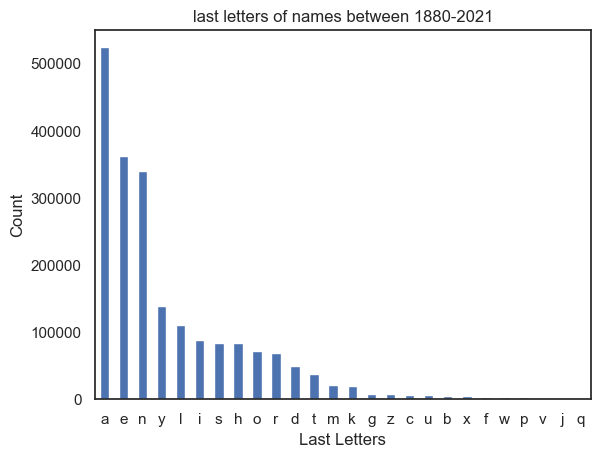

In [232]:
lastLettersDf = df['last_letter'].value_counts()
dfPlot = lastLettersDf.plot(kind='bar', title='last letters of names between 1880-2021', rot=0)
dfPlot.set_xlabel("Last Letters")
dfPlot.set_ylabel("Count")

## Task 4

<AxesSubplot: title={'center': 'count of letter z as last letter in names'}, xlabel='year', ylabel='count'>

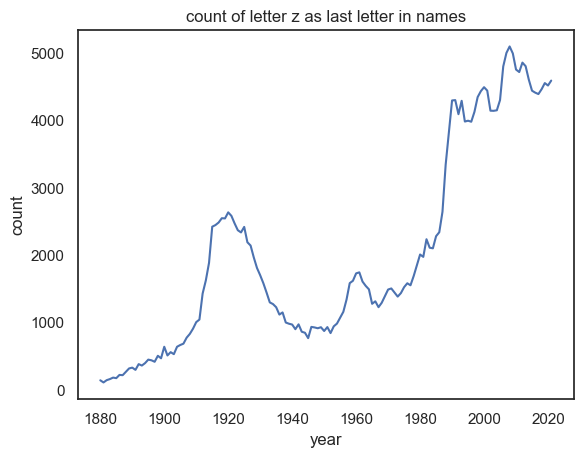

In [231]:
lastIsZ = df.loc[df['last_letter'] == 'z']

countPerYear = lastIsZ.groupby(['year']).sum()

countPerYearPlt = countPerYear.plot(title="count of letter z as last letter in names", ylabel='count', legend=False)

countPerYearPlt

## Task 5

<AxesSubplot: title={'center': 'count of letters a, e and o as last letter in names'}, xlabel='year', ylabel='count'>

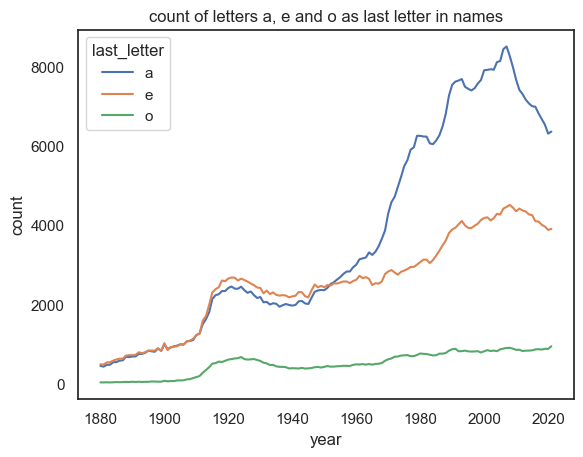

In [229]:
yearsLettersHier = df.groupby(['last_letter', 'year'])['last_letter'].count()

yearsLettersHier

yearsLettersCross = yearsLettersHier.unstack(0)

yearsLettersPlt = yearsLettersCross[['a', 'e', 'o']].plot(title="count of letters a, e and o as last letter in names", ylabel='count')
yearsLettersPlt

## Task 6

Text(0.5, 1.0, 'Count of first-last-letter combinations in names')

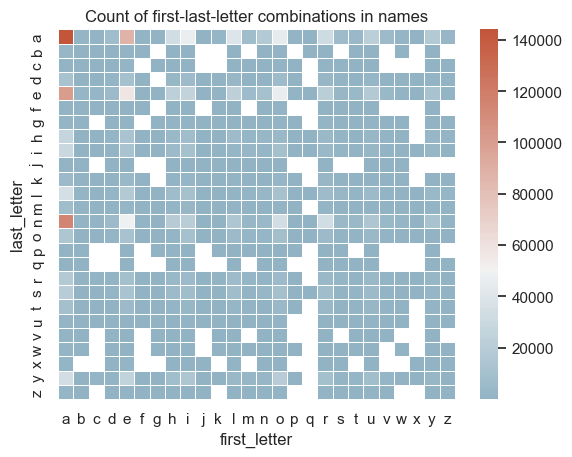

In [238]:
dfLower = df.copy()

dfLower['name'] = dfLower['name'].str.lower()

dfLower['first_letter'] = dfLower['name'].str[1]

lastFirstHier = dfLower.groupby(['first_letter', 'last_letter'])['name'].count()

lastFirstCross = lastFirstHier.unstack(0)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

lastFirstHtmp = sns.heatmap(lastFirstCross, cmap=cmap, center=50000, xticklabels=True, yticklabels=True, linewidths=.5)
lastFirstHtmp.set_title('Count of first-last-letter combinations in names')

## Task 7

In [239]:
dfPlot.figure.savefig("dfPlot.png", dpi=150)
countPerYearPlt.figure.savefig("countPerYearPlt.png", dpi=150)
yearsLettersPlt.figure.savefig("yearsLettersPlt.png", dpi=150)
lastFirstHtmp.figure.savefig("lastFirstHtmp.png", dpi=150)

## Task 8

You could either use a **catplot**, example [here](https://seaborn.pydata.org/examples/grouped_barplot.html), with the letter on the x axis and the count on the y axis.

or a **violin plot**, example [here](https://seaborn.pydata.org/examples/wide_form_violinplot.html), with the gender on the x axis and the letters on the y axis, where the width of the violin represents the sum / count of that letter.